<h1>
Group Members <br>
1. Dipesh Sapkota <br>
2. Rajat Saud
</h1>

<h4>The ipynb file was ran on google collab, so If you want to run this code, You first need to fix the path below for the dataset. For the path you need to download the dataset we provided and upload to your drive and give its path in the directory it is in and then run this code in Collab. For visulaization we used plotly and matplotlib.</h4>

<h4>For you all the plots might not show, for this you might need to install plotly</h4>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=47d488dfb388dace94f045f479c8ab4253f14744010a82ca1bfcbe9a4504102e
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
path = "/content/drive/MyDrive/BigDataCoursework/nba-raptor/historical_RAPTOR_by_team.csv"

<h4>
Making A Spark Session
</h4>

In [ ]:
spark = SparkSession.builder.appName('NBA').getOrCreate()

<h4>Data Loading</h4>


In [ ]:
df = spark.read.csv(path, inferSchema=True, header=True)

In [ ]:
df.show(2)

+--------------+---------+------+-----------+----+----+---+--------------+--------------+------------+------------+--------------+------------+----------------+----------------+--------------+-----------+
|   player_name|player_id|season|season_type|team|poss| mp|raptor_offense|raptor_defense|raptor_total|   war_total|war_reg_season|war_playoffs|predator_offense|predator_defense|predator_total|pace_impact|
+--------------+---------+------+-----------+----+----+---+--------------+--------------+------------+------------+--------------+------------+----------------+----------------+--------------+-----------+
|Alaa Abdelnaby|abdelal01|  1991|         PO| POR|  26| 13|  -6.565556058|  -1.999625336|-8.565181395| -0.03902819|           0.0| -0.03902819|    -6.966436741|    -4.170021165|  -11.13645791|-1.78524722|
|Alaa Abdelnaby|abdelal01|  1991|         RS| POR| 614|290|  -3.827204016|  -0.447001044| -4.27420506|-0.226162818|  -0.226162818|         0.0|    -3.776125431|    -1.592066651|  -

<h4>Describing the data as it helps us understands the data thoroughlly</h4>

In [ ]:
df.describe().toPandas()

,summary,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,count,29976,29976,29976,29976,29976,29976,29976,29976,29976,29976,29974,29975,29975,29976,29976,29976,29974
1,mean,None,None,2001.80978115826,None,None,1759.8591206298372,871.1659661062183,-1.2581177182018113,-0.3125299037425535,-1.5706476219497645,1.2661594721092875,1.1453317259312437,0.12078550566186962,-1.2740534422658225,-0.554149565846638,-1.8282030081071532,0.24210716291051004
2,stddev,None,None,13.026605702135775,None,None,1818.6804060687543,894.8046261296754,4.642985071107699,3.4344779445282674,6.192613448492328,2.580880274928849,2.5897985128212806,0.4800063433680449,4.25563171654881,3.2586256644512717,6.017652976389468,1.0721961183430033
3,min,A.C. Green,abdelal01,1977,PO,ATL,1,0,-82.19207167,-64.76756734,-103.0848009,-7.382977773,-7.382977773,-1.376520078,-71.51008587,-48.88611513,-101.4426499,-10.81630642
4,max,Zylan Cheatham,zubaciv01,2022,RS,WSB,8303,3638,77.83282549,106.9906549,157.2403672,24.35597794,24.35597794,7.006934064,80.67230841,90.41092039,157.6421155,23.73266909


<h4>Data Cleaning</h4>

In [ ]:
from pyspark.sql.functions import col,isnan,when,count
df2 = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df2.show()

+-----------+---------+------+-----------+----+----+---+--------------+--------------+------------+---------+--------------+------------+----------------+----------------+--------------+-----------+
|player_name|player_id|season|season_type|team|poss| mp|raptor_offense|raptor_defense|raptor_total|war_total|war_reg_season|war_playoffs|predator_offense|predator_defense|predator_total|pace_impact|
+-----------+---------+------+-----------+----+----+---+--------------+--------------+------------+---------+--------------+------------+----------------+----------------+--------------+-----------+
|          0|        0|     0|          0|   0|   0|  0|             0|             0|           0|        2|             1|           1|               0|               0|             0|          2|
+-----------+---------+------+-----------+----+----+---+--------------+--------------+------------+---------+--------------+------------+----------------+----------------+--------------+-----------+



<h4>Dropping rows that has missing values</h4>

In [ ]:
df = df.na.drop()

In [ ]:
from pyspark.sql.functions import col,isnan,when,count
df2 = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df2.show()

+-----------+---------+------+-----------+----+----+---+--------------+--------------+------------+---------+--------------+------------+----------------+----------------+--------------+-----------+
|player_name|player_id|season|season_type|team|poss| mp|raptor_offense|raptor_defense|raptor_total|war_total|war_reg_season|war_playoffs|predator_offense|predator_defense|predator_total|pace_impact|
+-----------+---------+------+-----------+----+----+---+--------------+--------------+------------+---------+--------------+------------+----------------+----------------+--------------+-----------+
|          0|        0|     0|          0|   0|   0|  0|             0|             0|           0|        0|             0|           0|               0|               0|             0|          0|
+-----------+---------+------+-----------+----+----+---+--------------+--------------+------------+---------+--------------+------------+----------------+----------------+--------------+-----------+



In [ ]:
df.columns

['player_name',
 'player_id',
 'season',
 'season_type',
 'team',
 'poss',
 'mp',
 'raptor_offense',
 'raptor_defense',
 'raptor_total',
 'war_total',
 'war_reg_season',
 'war_playoffs',
 'predator_offense',
 'predator_defense',
 'predator_total',
 'pace_impact']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

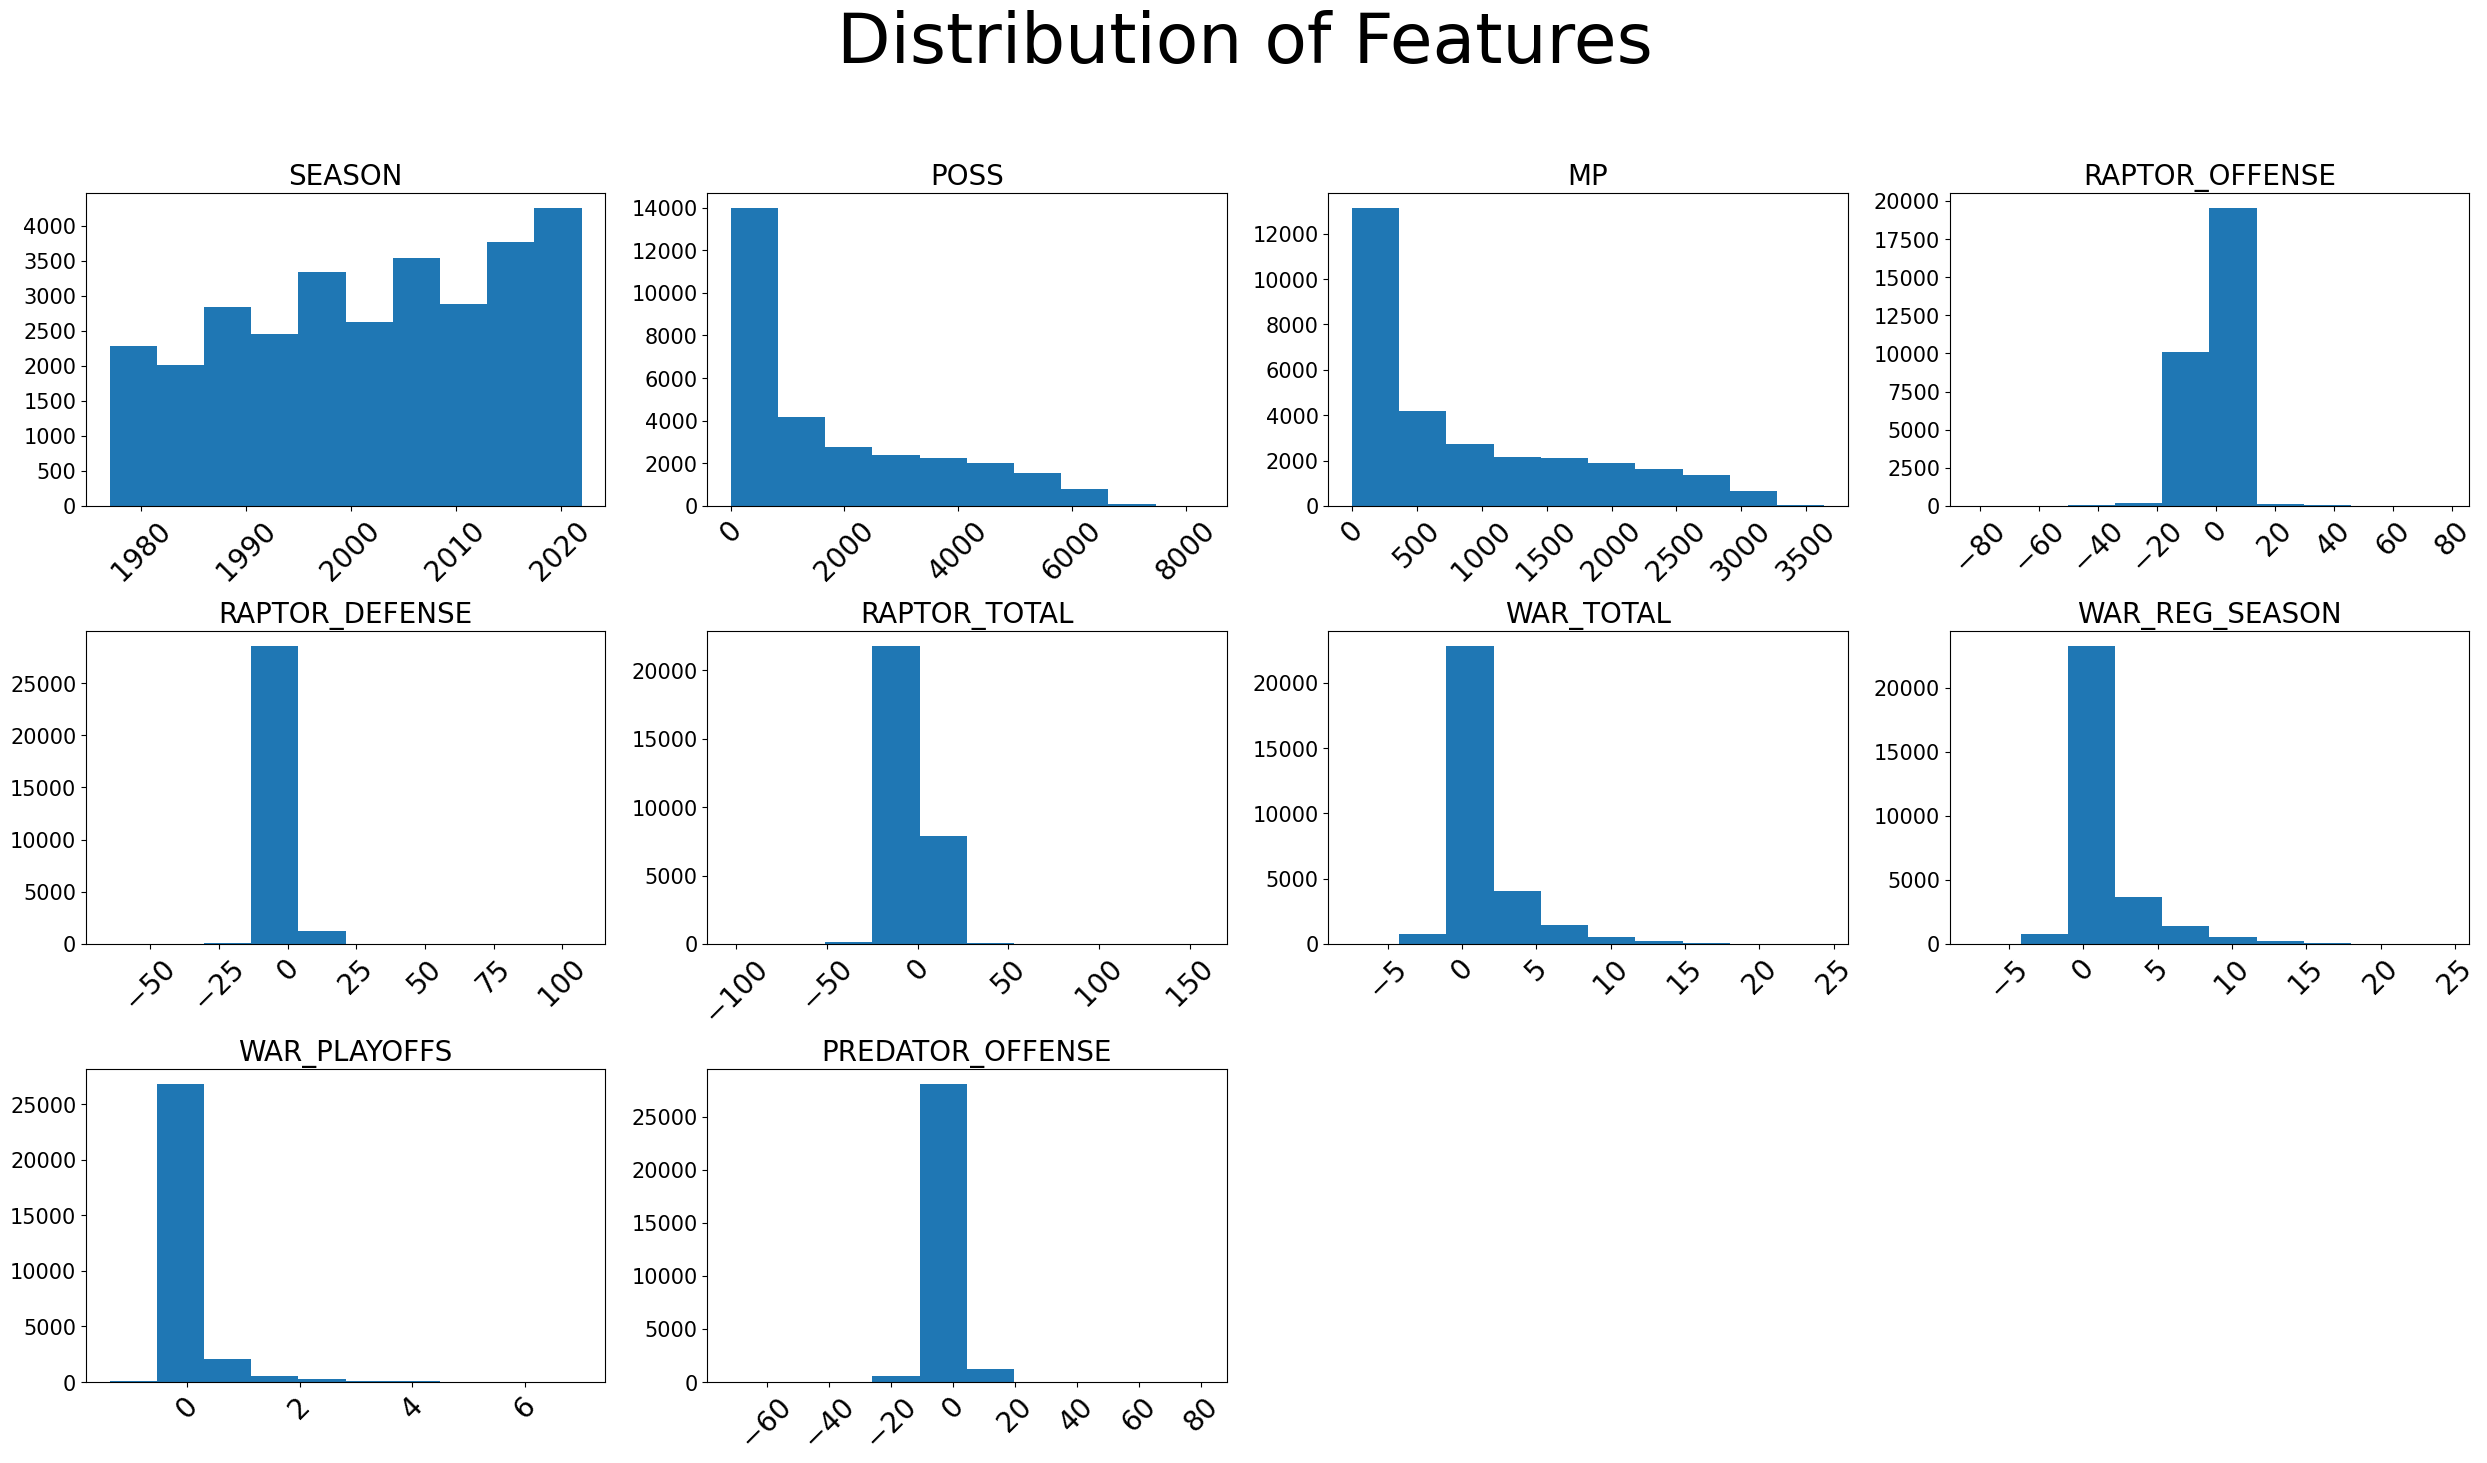

In [ ]:
fig = plt.figure(figsize=(25, 15))
st = fig.suptitle("Distribution of Features", fontsize=50, verticalalignment="center")
for col, num in zip(df.toPandas().describe().columns, range(1, 11)):
  ax = fig.add_subplot(3, 4, num)
  ax.hist(df.toPandas()[col])
  plt.grid(False)
  plt.xticks(rotation=45, fontsize=20)
  plt.yticks(fontsize=15)
  plt.title(col.upper(), fontsize=20)

plt.tight_layout()
st.set_y(0.95)
fig.subplots_adjust(top=0.85, hspace=0.4)
plt.show()

<h4>Checking the corerlation between both types of ratings raptor and predator ratings</h4>

In [ ]:
import plotly.express as px

In [ ]:
data = df.toPandas()
fig = px.scatter(data, x="raptor_total", y="predator_total",
              width=900, height=400)
fig.show()

<h4>Checking the number of seasons</h4>

In [ ]:
df.select("season").distinct().count()

46

In [ ]:
import pyspark.sql.functions as F
season_counts = df.groupBy('season').agg(F.count('*').alias('counts'))

In [ ]:
import plotly.express as px
data = season_counts.toPandas()
fig = px.bar(data, x='season', y='counts', color='season', 
             title="Data distributed across the seasons",
             width=600, height=400)
fig.show()

<h4>Dividing the dataset according to sesons on a 7 year interval Each interval is defined as season1, season2 accordingly in asceding order</h4>

And the the different dataframe are saved to list named df_name accordingly in increasing order

In [ ]:
j = 1
df_name = []
for i in range(1977, 2022, 7):
    name = "df" + str(j)
    if i == 2012:
      name = df.filter((df['season'] >= i) & (df['season'] <=(i+5) ))
    elif i == 2019:
      name = df.filter((df['season'] >= 2018) & (df['season'] <=(i+6) ))
    else:
      name = df.filter((df['season'] >= i) & (df['season'] <=(i+6) ))
    j += 1
    df_name.append(name)


<h4>After dividing the seasons the season is distribute as below (it is just one example)</h4>

In [ ]:
df_name[0].select("season").distinct().show()

+------+
|season|
+------+
|  1977|
|  1978|
|  1979|
|  1982|
|  1980|
|  1983|
|  1981|
+------+



<h4>Checking The season types</h4>

In [ ]:
df_name[0].select("season_type").distinct().show()

+-----------+
|season_type|
+-----------+
|         PO|
|         RS|
+-----------+



In [ ]:
import plotly.express as px

In [ ]:
import pyspark.sql.functions as F
season_type_counts = df.groupBy('season_type').agg(F.count('*').alias('counts'))

In [ ]:
data = season_type_counts.toPandas()
fig = px.bar(data, x='season_type', y='counts', color='season_type', 
             title='Number of rows per season type',
             width=600, height=400)
fig.show()

<h4>Here PO = Playoffs <br>
     RS = Regular Season <br>
And thus dividing the dataset in two parts PO and RS </h4>

<h3><b>First Dividing the dataset according to Regular Season </b></h3>

<h4>For regular season a player plays avg 20 mins per game in NBA <br>
And a team plays 82 games in a regular season <br>
and calculating for 60% of the games i.e 49<br>
so avg min playes by a player in a regular season = 20*49 = 980 <br>
And so the dataset is filtered on Regular Season and minutes above or equal to 980
</h4>

In [ ]:
regular_seasons = []
for i in range(1, 8):
  name = "regularSeason_df" + str(i)
  name = df_name[i-1].filter((df_name[i-1]['season_type'] == "RS" ) & (df_name[i-1]['mp'] >= 980 ))
  regular_seasons.append(name)

In [ ]:
regular_seasons[0].show(2)

+-------------------+---------+------+-----------+----+----+----+--------------+--------------+------------+-----------+--------------+------------+----------------+----------------+--------------+------------+
|        player_name|player_id|season|season_type|team|poss|  mp|raptor_offense|raptor_defense|raptor_total|  war_total|war_reg_season|war_playoffs|predator_offense|predator_defense|predator_total| pace_impact|
+-------------------+---------+------+-----------+----+----+----+--------------+--------------+------------+-----------+--------------+------------+----------------+----------------+--------------+------------+
|Kareem Abdul-Jabbar|abdulka01|  1977|         RS| LAL|6654|3016|   4.267100592|   3.075578862| 7.342679454|15.45621631|   15.45621631|         0.0|     4.482404412|     2.556956237|   7.039360649|-0.513827638|
|Kareem Abdul-Jabbar|abdulka01|  1978|         RS| LAL|5064|2265|   3.631396147|   3.605262508| 7.236658656|11.47897192|   11.47897192|         0.0|     4.1

<h4>As there are multiple ratings (data) for players, we are adding their ratings and minutes and saving the new dataframe in new list name agg_dfs<br>
It is done for all divided seasons(7 years) </h4>

In [ ]:
from pyspark.sql.functions import sum, col

agg_dfs = []
for i in range(1,8):
  name = "top_df" + str(i)
  name = regular_seasons[i-1].groupBy('player_name', 'player_id', 'season_type', 'team') \
                .agg(sum(col('mp')).alias('total_mp'),
                      sum(col('raptor_offense')).alias('total_raptor_offense'),
                      sum(col('raptor_defense')).alias('total_raptor_defense'),
                      sum(col('raptor_total')).alias('total_raptor_total'),
                      sum(col('predator_offense')).alias('total_predator_offense'),
                      sum(col('predator_defense')).alias('total_predator_defense'),
                      sum(col('predator_total')).alias('total_predator_total'),
                      sum(col('poss')).alias('total_poss'),
                      sum(col('war_total')).alias('total_war_total'),
                      sum(col('war_reg_season')).alias('total_reg_season'),
                      sum(col('war_playoffs')).alias('total_war_playoffs'),
                      sum(col('pace_impact')).alias('total_pace_impact'))
  
  agg_dfs.append(name) 

agg_dfs[0].show(2)


+-------------+---------+-----------+----+--------+--------------------+--------------------+------------------+----------------------+----------------------+--------------------+----------+---------------+----------------+------------------+--------------------+
|  player_name|player_id|season_type|team|total_mp|total_raptor_offense|total_raptor_defense|total_raptor_total|total_predator_offense|total_predator_defense|total_predator_total|total_poss|total_war_total|total_reg_season|total_war_playoffs|   total_pace_impact|
+-------------+---------+-----------+----+--------+--------------------+--------------------+------------------+----------------------+----------------------+--------------------+----------+---------------+----------------+------------------+--------------------+
|Otis Birdsong|birdsot01|         RS| KCK|   10195|          8.02015574|        -1.620116866|       6.400038874|            7.57341164|          -0.750337163|         6.823074476|     22510|   23.447984941|  

<h4>Process of Scaling our Dataset to be ready for clustering</h4>

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['total_mp',
                                        'total_raptor_offense',
                                        'total_raptor_defense',
                                        'total_raptor_total',
                                        'total_predator_offense',
                                        'total_predator_defense',
                                        'total_predator_total',
                                        'total_reg_season',
                                        'total_pace_impact',
                                        ], outputCol="features")

In [ ]:
for i in range(7):
  agg_dfs[i] = assembler.transform(agg_dfs[i])

In [ ]:
from pyspark.ml.feature import MinMaxScaler
minmax_Scaler = MinMaxScaler(inputCol="features", outputCol="Scaled_features")
for i in range(7):
  agg_dfs[i] = minmax_Scaler.fit(agg_dfs[i]).transform(agg_dfs[i])

<h4>The scaled data are saved in Scaled_features column</h4>

In [ ]:
agg_dfs[0].show(2)

+-------------+---------+-----------+----+--------+--------------------+--------------------+------------------+----------------------+----------------------+--------------------+----------+---------------+----------------+------------------+--------------------+--------------------+--------------------+
|  player_name|player_id|season_type|team|total_mp|total_raptor_offense|total_raptor_defense|total_raptor_total|total_predator_offense|total_predator_defense|total_predator_total|total_poss|total_war_total|total_reg_season|total_war_playoffs|   total_pace_impact|            features|     Scaled_features|
+-------------+---------+-----------+----+--------+--------------------+--------------------+------------------+----------------------+----------------------+--------------------+----------+---------------+----------------+------------------+--------------------+--------------------+--------------------+
|Otis Birdsong|birdsot01|         RS| KCK|   10195|          8.02015574|        -1

<h4>Evaluating the model for number of Clusters</h4>

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator
eval = ClusteringEvaluator(
    predictionCol = "prediction",
    featuresCol="Scaled_features",
    metricName="silhouette",
    distanceMeasure = "squaredEuclidean"
)

In [ ]:
from pyspark.ml.clustering import KMeans
silhouette_score = []
print("""
Silhouette scores for K means Clustering
========================================
Model\tScore\t
=====\t======\t
""")
for k in range(2, 11):
  kmeans_alg = KMeans(featuresCol="Scaled_features", k=k)
  kmeans_fit = kmeans_alg.fit(agg_dfs[0])
  output = kmeans_fit.transform(agg_dfs[0])
  score = eval.evaluate(output)
  silhouette_score.append(score)
  print(f"K{k}\t{round(score, 2)}\t")
  


Silhouette scores for K means Clustering
Model	Score	
=====	======	

K2	0.78	
K3	0.62	
K4	0.47	
K5	0.46	
K6	0.47	
K7	0.31	
K8	0.3	
K9	0.34	
K10	0.47	


<h4>Line Plot to show how many clusters is good for our model for Playoffs Data</h4>

Text(0, 0.5, 'Score')

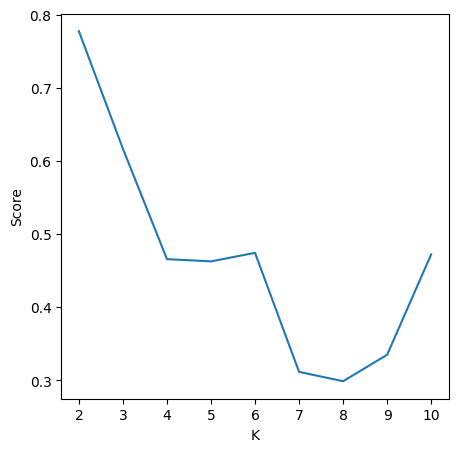

In [ ]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(range(2, 11), silhouette_score)
ax.set_xlabel("K")
ax.set_ylabel("Score")

<h4>Training and predicting our datset in the model using KMeans </h4>

In [ ]:
kmeans_alg = KMeans(featuresCol="Scaled_features", k=2)
trained_output = []
for i in range(7):
  kmeans_fit = kmeans_alg.fit(agg_dfs[i])
  trained_output.append(kmeans_fit.transform(agg_dfs[i]))

<h2>Now Analyzing and Clustering the datas for every regular season we divided</h2>

<h2>Season1</h2>

In [ ]:
import plotly.express as px

<h3>Scatter Plots of Players in Regular Season using according KMeans</h3>

In [ ]:
s1_rs = trained_output[0]
data = s1_rs.toPandas()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:
s1_rs = trained_output[0]
data = s1_rs.toPandas()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Regular Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s1_rs.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+-------------------+-----------+--------+--------------------+----------------------+-------------------+
|        player_name|season_type|total_mp|total_raptor_offense|total_predator_offense|  total_pace_impact|
+-------------------+-----------+--------+--------------------+----------------------+-------------------+
|      George Gervin|         RS|   19796|  25.574337497000002|    26.162917014000005|       -1.351733396|
|      Julius Erving|         RS|   19067|  24.033626884000004|          25.409167219|       -2.198490059|
|    Marques Johnson|         RS|   15525|        22.232831067|          21.859357926|-3.1869588060000007|
|      Magic Johnson|         RS|   10064|  21.997775101000002|           22.21124641|       -1.398809463|
|Kareem Abdul-Jabbar|         RS|   19788|        19.830041497|    21.861534492000004|       -4.294447923|
+-------------------+-----------+--------+--------------------+----------------------+-------------------+



<h3>Top Players According to Defense Ratings in Regular Season</h3>

In [ ]:
top_df_defense = s1_rs.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+-------------------+-----------+--------+--------------------+----------------------+-------------------+
|        player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|  total_pace_impact|
+-------------------+-----------+--------+--------------------+----------------------+-------------------+
|       Tree Rollins|         RS|   11352|        21.209923096|          18.687463436|         -0.7176206|
|        Alvan Adams|         RS|   15618|        19.203240866|    16.622260135999998|0.11545496399999997|
|Kareem Abdul-Jabbar|         RS|   19788|  15.790484354000002|          11.687201274|       -4.294447923|
|         Jack Sikma|         RS|   16522|        15.124128915|          14.488892544|-1.4426864229999998|
|      Julius Erving|         RS|   19067|  14.610010103999999|          12.683587483|       -2.198490059|
+-------------------+-----------+--------+--------------------+----------------------+-------------------+



<h2>Season2</h2>





<h3>Scatter Plots of Players in Regular Season using according KMeans</h3>

In [ ]:
s2_rs = trained_output[1]
data = s2_rs.toPandas()
# s1_rs.show()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:
# s1_rs.show()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Regular Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s2_rs.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+---------------+-----------+--------+--------------------+----------------------+--------------------+
|    player_name|season_type|total_mp|total_raptor_offense|total_predator_offense|   total_pace_impact|
+---------------+-----------+--------+--------------------+----------------------+--------------------+
|  Magic Johnson|         RS|   19290|        51.315192599|     50.65860910199999|        -4.923324149|
| Michael Jordan|         RS|   16188|        36.251772338|    36.863630998000005|-0.07492760300000001|
|     Larry Bird|         RS|   18216|        34.736343264|          37.240424386|        -3.284266402|
|Charles Barkley|         RS|   17382|        32.252322199|          33.255952539|        -0.145822551|
|  John Stockton|         RS|   14211|        31.509295887|          29.503233374|         0.690905157|
+---------------+-----------+--------+--------------------+----------------------+--------------------+



<h3>Top Players According to Defense Ratings in Regular Season</h3>

In [ ]:
top_df_defense = s2_rs.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+---------------+-----------+--------+--------------------+----------------------+------------------+
|    player_name|season_type|total_mp|total_raptor_defense|total_predator_defense| total_pace_impact|
+---------------+-----------+--------+--------------------+----------------------+------------------+
|Hakeem Olajuwon|         RS|   17114|        30.248939952|          27.647657112|      -0.776305159|
|     Mark Eaton|         RS|   17934|        27.103123821|          21.826429704|      -3.656869545|
|  Bill Laimbeer|         RS|   19713|  14.865301454999999|          14.665521023|      -2.402680808|
|  John Stockton|         RS|   14211|  13.641057989000002|           16.06757488|       0.690905157|
|     Doc Rivers|         RS|   14715|        13.313891811|    17.455604617000002|2.6995983690000003|
+---------------+-----------+--------+--------------------+----------------------+------------------+



<h2>Season3</h2>

<h3>Scatter Plots of Players in Regular Season using according KMeans</h3>

In [ ]:
s3_rs = trained_output[2]
data = s3_rs.toPandas()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Regular Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s3_rs.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+--------------+-----------+--------+--------------------+----------------------+-------------------+
|   player_name|season_type|total_mp|total_raptor_offense|total_predator_offense|  total_pace_impact|
+--------------+-----------+--------+--------------------+----------------------+-------------------+
| John Stockton|         RS|   20615|        51.738779884|          50.706574816|       -2.014418962|
|Michael Jordan|         RS|   15399|        38.156366084|          39.420462769|-1.2027372330000001|
| Reggie Miller|         RS|   19936|        35.849909991|          34.926208878|-1.0920703500000002|
| Kevin Johnson|         RS|   15780|         32.69711341|          31.106339798|       -3.969247298|
|Scottie Pippen|         RS|   20994|         28.35376764|          32.036773834|0.22712248500000004|
+--------------+-----------+--------+--------------------+----------------------+-------------------+



<h3>Top Players According to Defense Ratings in Regular Season</h3>

In [ ]:
top_df_defense = s3_rs.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+---------------+-----------+--------+--------------------+----------------------+-------------------+
|    player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|  total_pace_impact|
+---------------+-----------+--------+--------------------+----------------------+-------------------+
|Hakeem Olajuwon|         RS|   19719|        34.037722591|    31.051667424999998|       -2.605799052|
| David Robinson|         RS|   18204|  31.864356032000003|          27.647783282|       -3.690383584|
|  Patrick Ewing|         RS|   20819|  29.528561661999998|    23.912616834999998|-1.9074081809999996|
| Scottie Pippen|         RS|   20994|        19.899749562|    19.889076982000002|0.22712248500000004|
|  Nate McMillan|         RS|   10281|        18.680518787|    20.454228756999996|        4.052514057|
+---------------+-----------+--------+--------------------+----------------------+-------------------+



<h2>Season4</h2>

<h3>Scatter Plots of Players in Regular Season using according KMeans</h3>

In [ ]:
s4_rs = trained_output[3]
data = s4_rs.toPandas()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Regular Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s4_rs.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+----------------+-----------+--------+--------------------+----------------------+--------------------+
|     player_name|season_type|total_mp|total_raptor_offense|total_predator_offense|   total_pace_impact|
+----------------+-----------+--------+--------------------+----------------------+--------------------+
|   John Stockton|         RS|   12938|        34.593195903|          32.636581764|        -1.751877908|
|     Kobe Bryant|         RS|   18170|  29.463634401999997|          30.252175307|-0.45382754599999997|
|     Gary Payton|         RS|   17246|  29.221787801000005|          30.525956437|        -1.016218626|
|Shaquille O'Neal|         RS|   17388|        28.215940404|          29.891628024| -2.0636325390000003|
|   Reggie Miller|         RS|   18010|  27.554232234000004|    25.789624847999995|        -2.629702453|
+----------------+-----------+--------+--------------------+----------------------+--------------------+



<h3>Top Players According to Defense Ratings in Regular Season</h3>

In [ ]:
top_df_defense = s4_rs.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+--------------+-----------+--------+--------------------+----------------------+-----------------+
|   player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|total_pace_impact|
+--------------+-----------+--------+--------------------+----------------------+-----------------+
|David Robinson|         RS|   12918|  31.277673157000002|          27.710078212|     -3.198254266|
|   Ben Wallace|         RS|   11604|         24.76657008|          23.999321934|      -3.73075334|
|    Tim Duncan|         RS|   20253|  22.151821342999998|          19.825497384|     -4.863226136|
| Shawn Bradley|         RS|    8749|        19.389451671|          17.196973856|     -1.834023297|
| Kevin Garnett|         RS|   21174|  18.551099149000002|          17.430330166|     -5.211811073|
+--------------+-----------+--------+--------------------+----------------------+-----------------+



<h2>Season5</h2>

<h3>Scatter Plots of Players in Regular Season using according KMeans</h3>

In [ ]:
s5_rs = trained_output[4]
data = s5_rs.toPandas()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Regular Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s5_rs.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+-------------+-----------+--------+--------------------+----------------------+-------------------+
|  player_name|season_type|total_mp|total_raptor_offense|total_predator_offense|  total_pace_impact|
+-------------+-----------+--------+--------------------+----------------------+-------------------+
|   Steve Nash|         RS|   18472|        46.097176905|          43.027034442|       -7.240800081|
| LeBron James|         RS|   18986|        41.848788313|          42.165813597|-1.4145781510000002|
|Manu Ginobili|         RS|   14122|        38.442659384|    38.813089958999996|        1.541319073|
|  Kobe Bryant|         RS|   20872|  37.500267376000004|          38.944818399|       -0.090380894|
|  Dwyane Wade|         RS|   18414|        37.408346771|           36.59946525|-0.7841412750000001|
+-------------+-----------+--------+--------------------+----------------------+-------------------+



<h3>Top Players According to Defense Ratings in Regular Season</h3>

In [ ]:
top_df_defense = s5_rs.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+----------------+-----------+--------+--------------------+----------------------+-------------------+
|     player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|  total_pace_impact|
+----------------+-----------+--------+--------------------+----------------------+-------------------+
|      Tim Duncan|         RS|   17482|  29.960676837999998|          25.771862782|       -6.101237139|
|   Dwight Howard|         RS|   20401|        19.695398072|    18.785192853999998|       -1.291941649|
|Andrei Kirilenko|         RS|   13730|        18.440853453|    14.427388966999999|       -3.264933755|
|  Gerald Wallace|         RS|   16718|  16.882537799999998|          18.153957506| 0.3104122429999999|
|      Josh Smith|         RS|   18066|        16.808589536|          14.493548697|-1.5807786890000002|
+----------------+-----------+--------+--------------------+----------------------+-------------------+



<h2>Season6</h2>

<h3>Scatter Plots of Players in Regular Season using according KMeans</h3>

In [ ]:
s6_rs = trained_output[5]
data = s6_rs.toPandas()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Regular Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s6_rs.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+-----------------+-----------+--------+--------------------+----------------------+------------------+
|      player_name|season_type|total_mp|total_raptor_offense|total_predator_offense| total_pace_impact|
+-----------------+-----------+--------+--------------------+----------------------+------------------+
|       Chris Paul|         RS|   13885|  46.686408816000004|    45.177242922999994|      -0.514781693|
|    Stephen Curry|         RS|   13780|        42.056618144|          44.302382993|      12.044744347|
|Russell Westbrook|         RS|   14458|        33.168543942|          35.901125976|10.682496534999999|
|     James Harden|         RS|   14815|        33.114541551|          33.970738337| 5.995521226999999|
|     Kevin Durant|         RS|   11365|  25.195976905000002|          25.663531862|       3.089760405|
+-----------------+-----------+--------+--------------------+----------------------+------------------+



<h3>Top Players According to Defense Ratings in Regular Season</h3>

In [ ]:
top_df_defense = s6_rs.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+--------------+-----------+--------+--------------------+----------------------+-------------------+
|   player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|  total_pace_impact|
+--------------+-----------+--------+--------------------+----------------------+-------------------+
|Draymond Green|         RS|   10627|        22.750174245|          24.386860401|        7.050477205|
| Kawhi Leonard|         RS|   12154|        21.297895644|          24.425735826|-0.6225045239999999|
|    Tim Duncan|         RS|    9633|        20.628185402|          19.426022646|-2.0668183689999995|
|    Marc Gasol|         RS|   14145|        17.884878191|    16.410502096000002|       -3.203779258|
|    Tony Allen|         RS|   10094|         17.69149745|          20.916083473|        1.983679612|
+--------------+-----------+--------+--------------------+----------------------+-------------------+



<h2>Season7</h2>

<h3>Scatter Plots of Players in Regular Season using according KMeans</h3>

In [ ]:
s7_rs = trained_output[6]
data = s7_rs.toPandas()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Regular Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s7_rs.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+--------------------+-----------+--------+--------------------+----------------------+------------------+
|         player_name|season_type|total_mp|total_raptor_offense|total_predator_offense| total_pace_impact|
+--------------------+-----------+--------+--------------------+----------------------+------------------+
|      Damian Lillard|         RS|   11436|  33.671299679095554|     34.46306220641412|4.9300203803331435|
|        Nikola Jokic|         RS|   12247|   33.00384329958894|    35.275554115772714| 3.126103831229197|
|       Stephen Curry|         RS|    8325|  31.038733112743706|     32.05900636081529| 9.240854963445784|
|        James Harden|         RS|    7901|  27.688951250000002|          29.217684221|0.6189576240000001|
|Giannis Antetokou...|         RS|   11248|    23.0736232690252|     22.74631248049976| 6.172253977185747|
+--------------------+-----------+--------+--------------------+----------------------+------------------+



<h3>Top Players According to Defense Ratings in Regular Season</h3>

In [ ]:
top_df_defense = s7_rs.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+--------------------+-----------+--------+--------------------+----------------------+-------------------+
|         player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|  total_pace_impact|
+--------------------+-----------+--------+--------------------+----------------------+-------------------+
|         Rudy Gobert|         RS|   11033|   31.38591448186201|    30.738148339477018| 0.1615171351222638|
|         Joel Embiid|         RS|    9454|   18.70042414433993|     17.79054751144815| 3.6197276480345635|
|      Draymond Green|         RS|    8885|   16.72707697739564|     16.95041313670452|  7.962936182990207|
|Giannis Antetokou...|         RS|   11248|  12.982226093010354|    11.585219107432037|  6.172253977185747|
|    Matisse Thybulle|         RS|    4270|  12.434843310476317|    14.415410929952175|0.35185046407456744|
+--------------------+-----------+--------+--------------------+----------------------+-------------------+



<h4>Data Relation between Player impact on team possessions per 48 minutes (total_pace_impact) and total raptor Rating</h4>

In [ ]:
fig = px.scatter(data, x = "total_pace_impact", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 title="Correlation between total_pace_impact and total_raptor_total ratings",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h4>Data Relation between Wins Above Replacement for regular season (total_war_reg_season) and total raptor Rating</h4>

In [ ]:
fig = px.scatter(data, x = "total_reg_season", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 title="Correlation between total_reg_season and total_raptor_total ratings",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()
data.head()

,player_name,player_id,season_type,team,total_mp,total_raptor_offense,total_raptor_defense,total_raptor_total,total_predator_offense,total_predator_defense,total_predator_total,total_poss,total_war_total,total_reg_season,total_war_playoffs,total_pace_impact,features,Scaled_features,prediction
0,Josh Hart,hartjo01,RS,NOP,4478,-0.011801,0.959309,0.947508,0.218632,2.983031,3.201662,9500,6.992209,6.992209,0.0,0.526100,"[4478.0, -0.011800620395758576, 0.959308912210...","[0.3104641874500754, 0.27516244165365655, 0.34...",0
1,Killian Hayes,hayeski01,RS,DET,1647,-3.684559,-0.373457,-4.058016,-3.957445,0.515450,-3.441995,3442,-1.101222,-1.101222,0.0,0.190761,"[1647.0, -3.684559365164491, -0.37345651911390...","[0.05919943196946836, 0.19612715519596807, 0.3...",0
2,Jeremiah Robinson-Earl,robinje02,RS,OKC,1087,-3.933108,0.688244,-3.244864,-4.558643,0.434354,-4.124289,2255,-0.272913,-0.272913,0.0,-0.558300,"[1087.0, -3.933108069700372, 0.688243983337218...","[0.009496760450874234, 0.19077855502187258, 0....",0
3,Ricky Rubio,rubiori01,RS,MIN,1772,-1.004387,-0.420522,-1.424909,-1.074482,0.663467,-0.411016,3815,1.202132,1.202132,0.0,0.349873,"[1772.0, -1.004386556274304, -0.42052248411054...","[0.07029377829058311, 0.2538026630164748, 0.31...",0
4,Langston Galloway,gallola01,RS,DET,3447,0.981602,-2.498876,-1.517275,0.206035,-2.764334,-2.558299,7186,3.489837,3.489837,0.0,-0.567066,"[3447.0, 0.981601594, -2.4988761779999997, -1....","[0.2189580189935209, 0.296539786052959, 0.2666...",0


<h2><b>Second Dividing the dataset according to Playoffs Season<b> </h2>

<h4>Here filtering data according to Playoffs and minutes played greater or equal to 177</h4>

In [ ]:
playoffs = []
for i in range(1, 8):
  name = "playoffs_df" + str(i)
  name = df_name[i-1].filter((df_name[i-1]['season_type'] == "PO" ) & (df_name[i-1]['mp'] >= 177 ))
  playoffs.append(name)

In [ ]:
playoffs[0].show(2)

+-------------------+---------+------+-----------+----+----+---+--------------+--------------+------------+-----------+--------------+------------+----------------+----------------+--------------+------------+
|        player_name|player_id|season|season_type|team|poss| mp|raptor_offense|raptor_defense|raptor_total|  war_total|war_reg_season|war_playoffs|predator_offense|predator_defense|predator_total| pace_impact|
+-------------------+---------+------+-----------+----+----+---+--------------+--------------+------------+-----------+--------------+------------+----------------+----------------+--------------+------------+
|Kareem Abdul-Jabbar|abdulka01|  1977|         PO| LAL|1020|467|   6.350693533|   3.288312932| 9.639006465|3.032038687|           0.0| 3.032038687|      6.59201857|      3.06513109|    9.65714966|-0.432080365|
|Kareem Abdul-Jabbar|abdulka01|  1979|         PO| LAL| 781|367|   4.320044397|   0.944021796| 5.264066192|1.535868321|           0.0| 1.535868321|     4.707191

<h4>As there are multiple ratings (data) for players, we are adding their ratings and minutes and saving the new dataframe in new list name agg_dfs<br>
It is done for all divided seasons(7 years) </h4>

In [ ]:
from pyspark.sql.functions import sum, col

agg_dfs = []
for i in range(1,8):
  name = "top_df" + str(i)
  name = playoffs[i-1].groupBy('player_name', 'player_id', 'season_type', 'team') \
                .agg(sum(col('mp')).alias('total_mp'),
                      sum(col('raptor_offense')).alias('total_raptor_offense'),
                      sum(col('raptor_defense')).alias('total_raptor_defense'),
                      sum(col('raptor_total')).alias('total_raptor_total'),
                      sum(col('predator_offense')).alias('total_predator_offense'),
                      sum(col('predator_defense')).alias('total_predator_defense'),
                      sum(col('predator_total')).alias('total_predator_total'),
                      sum(col('poss')).alias('total_poss'),
                      sum(col('war_total')).alias('total_war_total'),
                      sum(col('war_reg_season')).alias('total_war_reg_season'),
                      sum(col('war_playoffs')).alias('total_war_playoffs'),
                      sum(col('pace_impact')).alias('total_pace_impact'))
  
  agg_dfs.append(name) 


In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['total_mp',
                                        'total_raptor_offense',
                                        'total_raptor_defense',
                                        'total_raptor_total',
                                        'total_predator_offense',
                                        'total_predator_defense',
                                        'total_predator_total',
                                        'total_war_playoffs',
                                        'total_pace_impact',
                                        ], outputCol="features")

In [ ]:
for i in range(7):
  agg_dfs[i] = assembler.transform(agg_dfs[i])

In [ ]:
from pyspark.ml.feature import MinMaxScaler
minmax_Scaler = MinMaxScaler(inputCol="features", outputCol="Scaled_features")
for i in range(7):
  agg_dfs[i] = minmax_Scaler.fit(agg_dfs[i]).transform(agg_dfs[i])

In [ ]:
agg_dfs[0].show(2)

+------------+---------+-----------+----+--------+--------------------+--------------------+------------------+----------------------+----------------------+--------------------+----------+---------------+--------------------+------------------+-----------------+--------------------+--------------------+
| player_name|player_id|season_type|team|total_mp|total_raptor_offense|total_raptor_defense|total_raptor_total|total_predator_offense|total_predator_defense|total_predator_total|total_poss|total_war_total|total_war_reg_season|total_war_playoffs|total_pace_impact|            features|     Scaled_features|
+------------+---------+-----------+----+--------+--------------------+--------------------+------------------+----------------------+----------------------+--------------------+----------+---------------+--------------------+------------------+-----------------+--------------------+--------------------+
|Wally Walker|walkewa01|         PO| SEA|     261|        -1.312490556|        -0.

<h4>Process For Clustering Using KMeans</h4>

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator
eval = ClusteringEvaluator(
    predictionCol = "prediction",
    featuresCol="Scaled_features",
    metricName="silhouette",
    distanceMeasure = "squaredEuclidean"
)

In [ ]:
from pyspark.ml.clustering import KMeans
silhouette_score = []
print("""
Silhouette scores for K means Clustering
========================================
Model\tScore\t
=====\t======\t
""")
for k in range(2, 11):
  kmeans_alg = KMeans(featuresCol="Scaled_features", k=k)
  kmeans_fit = kmeans_alg.fit(agg_dfs[0])
  output = kmeans_fit.transform(agg_dfs[0])
  score = eval.evaluate(output)
  silhouette_score.append(score)
  print(f"K{k}\t{round(score, 2)}\t")
  


Silhouette scores for K means Clustering
Model	Score	
=====	======	

K2	0.83	
K3	0.67	
K4	0.66	
K5	0.36	
K6	0.34	
K7	0.39	
K8	0.49	
K9	0.39	
K10	0.34	


<h4>Line Plot to show how many clusters is good for our model for Playoffs Data</h4>

Text(0, 0.5, 'Score')

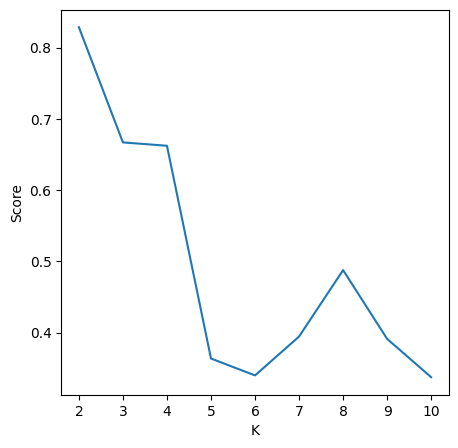

In [ ]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1, 1, figsize=(5,5))
ax.plot(range(2, 11), silhouette_score)
ax.set_xlabel("K")
ax.set_ylabel("Score")

<h4>Training our model and predicting and our data using the trained model for Playoffs Data</h4>

In [ ]:
kmeans_alg = KMeans(featuresCol="Scaled_features", k=2)
trained_output = []
for i in range(7):
  kmeans_fit = kmeans_alg.fit(agg_dfs[i])
  trained_output.append(kmeans_fit.transform(agg_dfs[i]))

<h2>Season1</h2>

In [ ]:
import plotly.express as px

<h3>Scatter Plots of Players in Playoffs Season using according KMeans</h3>

In [ ]:
s1_p = trained_output[0]
data = s1_p.toPandas()
# s1_rs.show()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Playoffs Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s1_p.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+---------------+-----------+--------+--------------------+----------------------+-------------------+
|    player_name|season_type|total_mp|total_raptor_offense|total_predator_offense|  total_pace_impact|
+---------------+-----------+--------+--------------------+----------------------+-------------------+
|  Julius Erving|         PO|    4047|  22.466303964999998|          24.224892606|-2.8526741579999997|
|Marques Johnson|         PO|    1507|        22.159700661|          22.515931267|-3.2041811279999997|
|  Magic Johnson|         PO|    1863|  20.275609664999998|          20.335102512|       -1.182422321|
| Maurice Cheeks|         PO|    2766|  16.675985620000002|          17.769413224|        0.099310705|
|  George Gervin|         PO|    1824|         16.52219952|          16.832699117|-0.5495935080000001|
+---------------+-----------+--------+--------------------+----------------------+-------------------+



<h3>Top Players According to Defense Ratings in Playoffs Season</h3>

In [ ]:
top_df_defense = s1_p.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+--------------+-----------+--------+--------------------+----------------------+--------------------+
|   player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|   total_pace_impact|
+--------------+-----------+--------+--------------------+----------------------+--------------------+
| Julius Erving|         PO|    4047|  13.210272530000001|          11.090940048| -2.8526741579999997|
|    Larry Bird|         PO|    1852|  12.826212181999999|          12.929708409|        -1.237145078|
|Maurice Cheeks|         PO|    2766|        12.696804254|          14.653593514|         0.099310705|
|Caldwell Jones|         PO|    3032|  12.515704873999999|           11.30813037| -1.6961077210000002|
| Robert Parish|         PO|    1167|        11.827138137|           9.839356984|-0.45126622400000005|
+--------------+-----------+--------+--------------------+----------------------+--------------------+



<h2>Season 2</h2>

<h3>Scatter Plots of Players in Playoffs Season using according KMeans</h3>

In [ ]:
s2_p = trained_output[1]
data = s2_p.toPandas()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:

fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Playoffs Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s2_p.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+--------------+-----------+--------+--------------------+----------------------+-------------------+
|   player_name|season_type|total_mp|total_raptor_offense|total_predator_offense|  total_pace_impact|
+--------------+-----------+--------+--------------------+----------------------+-------------------+
| Magic Johnson|         PO|    4590|        55.863689127|    55.910215203999996|       -4.206656619|
|    Larry Bird|         PO|    4531|  29.913954613999998|           32.32016376|       -3.389991716|
|  Isiah Thomas|         PO|    3417|        28.396566695|    31.784511821000002|0.42970475100000005|
|Michael Jordan|         PO|    1819|        21.572802116|          21.678837906|0.46355180700000004|
|  James Worthy|         PO|    4416|        20.614126265|          22.053787783|        -2.69446975|
+--------------+-----------+--------+--------------------+----------------------+-------------------+



<h3>Top Players According to Defense Ratings in Playoffs Season</h3>

In [ ]:
top_df_defense = s2_p.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+---------------+-----------+--------+--------------------+----------------------+--------------------+
|    player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|   total_pace_impact|
+---------------+-----------+--------+--------------------+----------------------+--------------------+
|  Bill Laimbeer|         PO|    2811|  18.315819023000003|          16.972373055|-0.25161888099999996|
|Hakeem Olajuwon|         PO|    1342|        16.353537315|          14.243037201|-0.47225054899999996|
|   Isiah Thomas|         PO|    3417|        14.066763489|          16.238477449| 0.42970475100000005|
|     Mark Eaton|         PO|     908|  11.572545636000001|           9.911067367|        -1.261634724|
|    John Salley|         PO|    1873|  11.310112786000001|          10.382450314|          1.01031925|
+---------------+-----------+--------+--------------------+----------------------+--------------------+



<h2>Season3</h2>

<h3>Scatter Plots of Players in Playoffs Season using according KMeans</h3>

In [ ]:
s3_p = trained_output[2]
data = s3_p.toPandas()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Playoffs Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s3_p.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+-----------------+-----------+--------+--------------------+----------------------+-------------------+
|      player_name|season_type|total_mp|total_raptor_offense|total_predator_offense|  total_pace_impact|
+-----------------+-----------+--------+--------------------+----------------------+-------------------+
|    John Stockton|         PO|    3397|         46.75708593|          46.702701964|-2.4583143209999996|
|   Michael Jordan|         PO|    4349|        42.534817308|          44.715256097|       -1.512296208|
|   Scottie Pippen|         PO|    4667|        26.600737555|    31.257611108000003| 0.7062874919999999|
|    Kevin Johnson|         PO|    2255|           20.777531|          21.000851889|       -2.530086127|
|Anfernee Hardaway|         PO|    1542|        18.503654322|          19.299797391|-0.5555564430000001|
+-----------------+-----------+--------+--------------------+----------------------+-------------------+



<h3>Top Players According to Defense Ratings in Playoffs Season</h3>

In [ ]:
top_df_defense = s3_p.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+---------------+-----------+--------+--------------------+----------------------+-------------------+
|    player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|  total_pace_impact|
+---------------+-----------+--------+--------------------+----------------------+-------------------+
|  Patrick Ewing|         PO|    3202|  27.308546187999998|          22.673168176|       -2.060962838|
| Scottie Pippen|         PO|    4667|  20.194438400000003|    19.393406128000002| 0.7062874919999999|
|Hakeem Olajuwon|         PO|    3394|  19.441748093999998|          18.427914026|-2.6749526429999997|
| Michael Jordan|         PO|    4349|  14.098855744999998|          14.194894695|       -1.512296208|
| Charles Oakley|         PO|    2940|        13.372038809|           14.08441088|       -1.106333858|
+---------------+-----------+--------+--------------------+----------------------+-------------------+



<h2>Season4</h2>

<h3>Scatter Plots of Players in Playoffs Season using according KMeans</h3>

In [ ]:
s4_p = trained_output[3]
data = s4_p.toPandas()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Playoffs Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s4_p.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+----------------+-----------+--------+--------------------+----------------------+--------------------+
|     player_name|season_type|total_mp|total_raptor_offense|total_predator_offense|   total_pace_impact|
+----------------+-----------+--------+--------------------+----------------------+--------------------+
|   Reggie Miller|         PO|    2831|        33.068943189|     32.92183193300001|        -2.885212387|
|Shaquille O'Neal|         PO|    4666|        30.048778688|          32.976462501| -3.5920519470000003|
|     Kobe Bryant|         PO|    4423|  23.844496914000004|          25.862020449|-0.41904905099999995|
|   John Stockton|         PO|    1484|        23.170596684|          21.863124168|        -0.838125621|
|   Allen Iverson|         PO|    2584|        17.158488449|          21.003812083| 0.13012732100000002|
+----------------+-----------+--------+--------------------+----------------------+--------------------+



<h3>Top Players According to Defense Ratings in Playoffs Season</h3>

In [ ]:
top_df_defense = s4_p.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+--------------+-----------+--------+--------------------+----------------------+------------------+
|   player_name|season_type|total_mp|total_raptor_defense|total_predator_defense| total_pace_impact|
+--------------+-----------+--------+--------------------+----------------------+------------------+
|David Robinson|         PO|    1901|        25.740829993|          23.268261928|      -1.451926041|
|   Ben Wallace|         PO|    2054|        23.228349254|    22.739091330999997|      -2.389729112|
|    Tim Duncan|         PO|    3439|  21.632961411000004|          18.312059509|      -5.021141955|
|  Robert Horry|         PO|    2675|  11.102820816000001|          11.968307627|1.7967767380000002|
|  Marcus Camby|         PO|     895|        10.635490823|           9.747937951|       0.123221628|
+--------------+-----------+--------+--------------------+----------------------+------------------+



<h2>Season5</h2>

<h3>Scatter Plots of Players in Playoffs Season using according KMeans</h3>

In [ ]:
s5_p = trained_output[4]
data = s5_p.toPandas()

fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:

fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Playoffs Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s5_p.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+-------------+-----------+--------+--------------------+----------------------+--------------------+
|  player_name|season_type|total_mp|total_raptor_offense|total_predator_offense|   total_pace_impact|
+-------------+-----------+--------+--------------------+----------------------+--------------------+
|   Steve Nash|         PO|    2543|         34.51549281|          33.600483167|         -4.44453938|
| LeBron James|         PO|    3089|  33.686485860000005|          34.552714523|        -0.650306902|
|Dirk Nowitzki|         PO|    3437|        32.150019059|           33.00169344|  -4.413827384999999|
|  Dwyane Wade|         PO|    2853|  30.016480818999998|          29.382439135|-0.42827745000000006|
|  Kobe Bryant|         PO|    3609|        29.482279667|          31.017454705|-5.74580999999962...|
+-------------+-----------+--------+--------------------+----------------------+--------------------+



<h3>Top Players According to Defense Ratings in Playoffs Season</h3>

In [ ]:
top_df_defense = s5_p.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+----------------+-----------+--------+--------------------+----------------------+--------------------+
|     player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|   total_pace_impact|
+----------------+-----------+--------+--------------------+----------------------+--------------------+
|      Tim Duncan|         PO|    3349|        20.104211051|          17.438609694|        -4.093774289|
|Anderson Varejao|         PO|    1600|        16.184674331|          17.547473284|         2.288442464|
|   Dwight Howard|         PO|    2079|  15.224923511999998|    14.134256296000002|-0.07058222699999994|
|   Kevin Garnett|         PO|    2081|        13.867877494|          13.161230725|        -1.170854436|
|      Josh Smith|         PO|    1477|        13.111671254|          12.313398796| 0.28606294500000007|
+----------------+-----------+--------+--------------------+----------------------+--------------------+



<h2>Season6</h2>

<h3>Scatter Plots of Players in Playoffs Season using according KMeans</h3>

In [ ]:
s6_p = trained_output[5]
data = s6_p.toPandas()

fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:

fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Playoffs Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s6_p.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+-----------------+-----------+--------+--------------------+----------------------+------------------+
|      player_name|season_type|total_mp|total_raptor_offense|total_predator_offense| total_pace_impact|
+-----------------+-----------+--------+--------------------+----------------------+------------------+
|       Chris Paul|         PO|    1824|        42.758956196|           41.37781706|      -2.043831294|
|    Stephen Curry|         PO|    2834|        40.112371793|          35.607404715|10.776512839999999|
|Russell Westbrook|         PO|    2370|        26.603532934|          27.492015269|       7.489527474|
|     James Harden|         PO|    1742|         25.71435273|          20.788446249|       9.208289289|
|    Kawhi Leonard|         PO|    2908|        24.767743929|    16.220384877999997|      -0.609950448|
+-----------------+-----------+--------+--------------------+----------------------+------------------+



<h3>Top Players According to Defense Ratings in Playoffs Season</h3>

In [ ]:
top_df_defense = s6_p.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+--------------+-----------+--------+--------------------+----------------------+-------------------+
|   player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|  total_pace_impact|
+--------------+-----------+--------+--------------------+----------------------+-------------------+
|Draymond Green|         PO|    2707|  29.940890355999997|    34.913910064999996|        8.156306299|
|  Paul Millsap|         PO|    1417|        22.499151839|          18.093423213| 1.8288441400000002|
|   Danny Green|         PO|    2394|         20.02704186|    25.673413220000004|0.20272363700000007|
|    Tim Duncan|         PO|    2418|        18.117533478|          20.051227634|       -5.805712154|
| Kawhi Leonard|         PO|    2908|        16.600354554|          23.391347526|       -0.609950448|
+--------------+-----------+--------+--------------------+----------------------+-------------------+



<h2>Season 7</h2>

<h3>Scatter Plots of Players in Playoffs Season using according KMeans</h3>

In [ ]:
s7_p = trained_output[6]
data = s7_p.toPandas()
# s1_rs.show()
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", 
                 hover_data = ["player_name"], 
                 color="prediction" , 
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

In [ ]:
fig = px.scatter(data, x = "total_mp", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 facet_col="prediction",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h3>Top Players According to Offense Ratings in Playoffs Season</h3>

In [ ]:
from pyspark.sql.functions import desc
top_df_offense = s7_p.sort(desc('total_raptor_offense'))
n = 5
top_n = top_df_offense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_offense", "total_predator_offense", "total_pace_impact").show()

+----------------+-----------+--------+--------------------+----------------------+------------------+
|     player_name|season_type|total_mp|total_raptor_offense|total_predator_offense| total_pace_impact|
+----------------+-----------+--------+--------------------+----------------------+------------------+
|Donovan Mitchell|         PO|    1443|  26.165093902351867|    14.474776416649277|  1.25472840838302|
|    James Harden|         PO|    1493|        22.056697285|          24.251129112|1.7498128839999998|
|  Damian Lillard|         PO|     898|  20.839123779851043|     17.49058962357072| 4.420801894362835|
|     Luka Doncic|         PO|    1048|  20.177671843218487|    22.509687270815856|1.9246779054486054|
|   Stephen Curry|         PO|    2165|   20.17319413018622|     20.63427136816518| 5.433948302950868|
+----------------+-----------+--------+--------------------+----------------------+------------------+



<h3>Top Players According to Defense Ratings in Playoffs Season</h3>

In [ ]:
top_df_defense = s7_p.sort(desc('total_raptor_defense'))
n = 5
top_n = top_df_defense.limit(n)
top_n.select("player_name", "season_type", "total_mp", "total_raptor_defense", "total_predator_defense", "total_pace_impact").show()

+--------------------+-----------+--------+--------------------+----------------------+--------------------+
|         player_name|season_type|total_mp|total_raptor_defense|total_predator_defense|   total_pace_impact|
+--------------------+-----------+--------+--------------------+----------------------+--------------------+
|         Joel Embiid|         PO|    1354|   33.01105795008486|     25.42216981324039|  3.2213288213506046|
|      Draymond Green|         PO|    2373|  14.956781722610422|    17.780281803361014|   4.425199238783583|
|          Al Horford|         PO|    1804|   13.23358889079473|    12.069814087320706|  -2.920404198274934|
|Giannis Antetokou...|         PO|    2319|  12.786437568089829|     10.04390905887693|   6.450473767991205|
|         Brook Lopez|         PO|    1765|  12.517206205638535|    11.056184589031417|-0.28260096230016274|
+--------------------+-----------+--------+--------------------+----------------------+--------------------+



<h4>Data Relation between Player impact on team possessions per 48 minutes (total_pace_impact) and total raptor Rating</h4>

In [ ]:
fig = px.scatter(data, x = "total_pace_impact", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 title="Correlation between total_pace_impact and total_raptor_total ratings",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()

<h4>Data Relation between Wins Above Replacement for playoffs (total_war_playoffs) and total raptor Rating</h4>

In [ ]:
fig = px.scatter(data, x = "total_war_playoffs", y= "total_raptor_total", color="prediction" , 
                 hover_data = ["player_name"], 
                 title="Correlation between total_war_playoffs and total_raptor_total ratings",
                 log_x=True,
                 width=800, height=400
)
fig.update_layout(
    margin=dict(l=20, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.update_traces(marker_size=8)

fig.show()